# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Create empty lists to append the API data into lists 
weather_data = {"City":[],
                "Cloudiness":[],
                "Country":[],
                "Date":[],
                "Humidity":[],
                "Lat":[],
                "Lng":[],
                "Max Temp":[],
                "Wind Speed": []}

# Get weather data
set_count = 1
record_count = 1

#setup loop
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
       
        # Delay 1 seconds between API calls
        time.sleep(1)
        
        # Reset record count  and increment set count after every 50 records
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | suntar
Processing Record 2 of Set 1 | sibu
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | chapais
Processing Record 9 of Set 1 | ihosy
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | makakilo city
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | soma
Processing Record 16 of Set 1 | vestmannaeyjar
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | itaqui
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | onda
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | cape town
Processing Record 24 of Set 1 | new norfolk
Processing Record 25 of Set 1 | 

Processing Record 35 of Set 4 | keti bandar
Processing Record 36 of Set 4 | foligno
Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | udachnyy
Processing Record 39 of Set 4 | kisanga
Processing Record 40 of Set 4 | urengoy
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | kamenka
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | panguna
Processing Record 46 of Set 4 | yeppoon
Processing Record 47 of Set 4 | kahului
City not found. Skipping...
Processing Record 48 of Set 4 | srednekolymsk
Processing Record 49 of Set 4 | indramayu
Processing Record 50 of Set 4 | termiz
Processing Record 0 of Set 5 | newport
Processing Record 1 of Set 5 | boffa
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | baykit
Processing Record 4 of Set 5 | sisimiut
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | alexandria
Processing Record 7 of Set 5 | lebu
Proc

Processing Record 25 of Set 8 | san remigio
Processing Record 26 of Set 8 | launceston
Processing Record 27 of Set 8 | weligama
Processing Record 28 of Set 8 | solnechnyy
Processing Record 29 of Set 8 | pen
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | novocheboksarsk
Processing Record 32 of Set 8 | mizdah
Processing Record 33 of Set 8 | imbituba
Processing Record 34 of Set 8 | waycross
Processing Record 35 of Set 8 | druzhba
Processing Record 36 of Set 8 | beloha
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | san juan
Processing Record 38 of Set 8 | kotelnikovo
Processing Record 39 of Set 8 | sungaipenuh
Processing Record 40 of Set 8 | tuy hoa
Processing Record 41 of Set 8 | ailigandi
Processing Record 42 of Set 8 | marovoay
Processing Record 43 of Set 8 | brest
Processing Record 44 of Set 8 | luwingu
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | saint-georges
City not found. Skipping...
Proces

Processing Record 4 of Set 12 | vresina
Processing Record 5 of Set 12 | ginda
Processing Record 6 of Set 12 | riwaka
Processing Record 7 of Set 12 | tahe
Processing Record 8 of Set 12 | kondinskoye
Processing Record 9 of Set 12 | japura
Processing Record 10 of Set 12 | gisborne
Processing Record 11 of Set 12 | frunze


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,suntar,63,RU,1587799773,66,62.14,117.63,46.60,5.57
1,sibu,75,MY,1587799775,74,2.30,111.82,86.00,6.93
2,laguna,1,US,1587799776,68,38.42,-121.42,69.01,3.38
3,dikson,97,RU,1587799777,97,73.51,80.55,20.28,16.11
4,clyde river,90,CA,1587799778,92,70.47,-68.59,12.20,16.11


In [5]:
# Exporting the city data into csv
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

In [6]:
#Find out basic data information 
# weather_df.describe()
weather_df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#Convert Column 'Date' to understandable data frame 
from datetime import datetime
from datetime import date

timestamp = weather_df.iloc[0, 3]

# Convert time stamp to date
data_date = date.fromtimestamp(timestamp)

# Format date in MM/DD/YY
formatted_date = data_date.strftime("%m/%d/%y")

#### Latitude vs. Temperature Plot

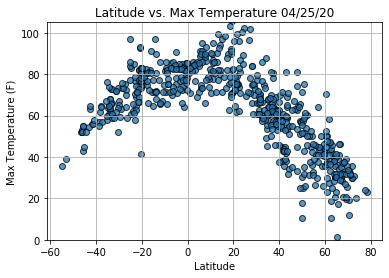

In [9]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Max Temperature {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("Output_Data/LatVsTemp.png")
plt.show()

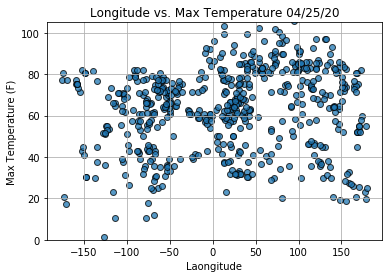

In [24]:
# Create scatter plot
plt.scatter(weather_df["Lng"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Longitude vs. Max Temperature {formatted_date}")
plt.xlabel("Laongitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("Output_Data/LngVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

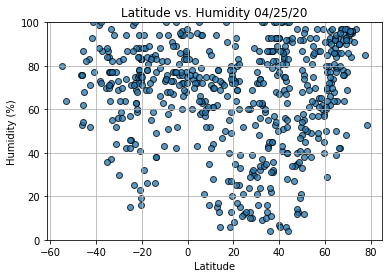

In [11]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Humidity {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,100)
plt.grid(True)

plt.savefig("Output_Data/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

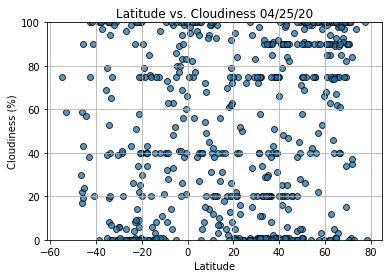

In [12]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Cloudiness {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,100)
plt.grid(True)

plt.savefig("Output_Data/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

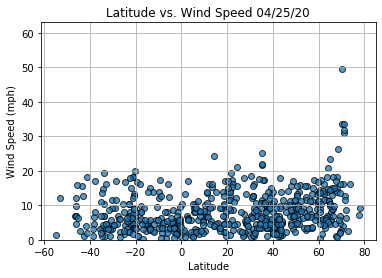

In [13]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Wind Speed {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,63)
plt.grid(True)

plt.savefig("Output_Data/LatVsWindSpeed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df.loc[(weather_df["Lat"]>0),:]
south = weather_df.loc[(weather_df["Lat"]<0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.852527477179319


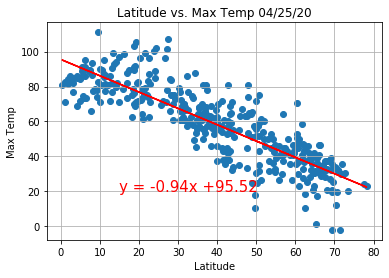

In [54]:
#Establish our X,Y Values & Regression Values
x = north['Lat']
y = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Max Temp {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(15,20),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_MaxTemp_Lat_North.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6808831964573043


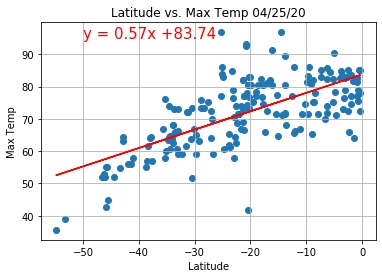

In [17]:
#Establish our X,Y Values & Regression Values
x = south['Lat']
y = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = c(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Max Temp {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,95),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_MaxTemp_Lat_South.png")
plt.show()

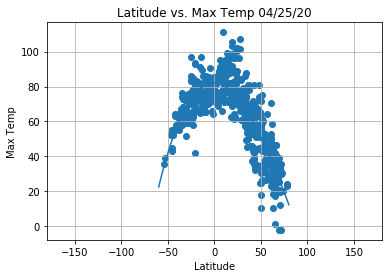

The R-squared result: 0.7365135313630607 shows that there is a strong relationship
Please put in a Latitude Value: 
0
 At a latitude of 0, the temperature will be 82.09082111189258 degrees(F)


In [102]:
#New Equation based on polunomial 
import numpy
from sklearn.metrics import r2_score
import pylab as p

mymodel = numpy.poly1d(numpy.polyfit(weather_df["Lat"],weather_df["Max Temp"], 3))
plt.xlim(-180,180)
myline = numpy.linspace(-60, 80, 100)
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.plot(myline, mymodel(myline))
plt.title(f"Latitude vs. Max Temp {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)

plt.savefig("Output_Data/PolynomialReg_LatVsTemp.png")
plt.show()

R2 = r2_score(weather_df["Max Temp"], mymodel(weather_df["Lat"]))
print(f'The R-squared result: {R2} shows that there is a strong relationship')
while True: 
    value = input("Please put in a Latitude Value: \n")
    if value.isdigit() and -180 <= int(value) <= 180:
        break;
    print("Error Invalid Input, Earth's Latitude only goes from -180 to 180")
v1 = int(value)
degree = mymodel(v1)
print(f' At a latitude of {value}, the temperature will be {degree} degrees(F)')

In [67]:
import numpy as np
import statsmodels.api as sm

X = weather_df["Lat"]
y = weather_df["Max Temp"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Max Temp   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.107
Method:                 Least Squares   F-statistic:                              69.62
Date:                Sat, 25 Apr 2020   Prob (F-statistic):                    5.44e-16
Time:                        04:09:42   Log-Likelihood:                         -3175.2
No. Observations:                 572   AIC:                                      6352.
Df Residuals:                     571   BIC:                                      6357.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2569694819934049


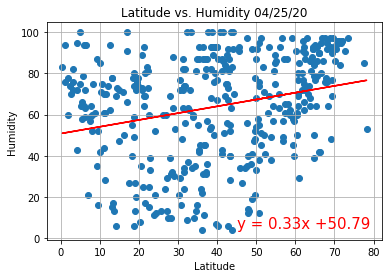

In [18]:
#Establish our X,Y Values & Regression Values
x = north['Lat']
y = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Humidity {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Humidity_Lat_North.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06978393382158632


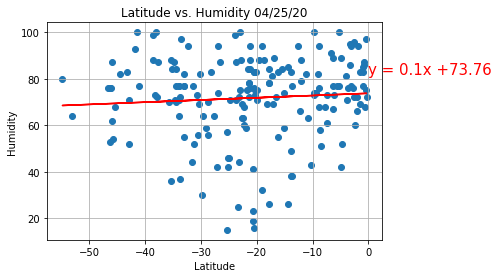

In [19]:
#Establish our X,Y Values & Regression Values
x = south['Lat']
y = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Humidity {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(0,82),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Humidity_Lat_South.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2434993239510319


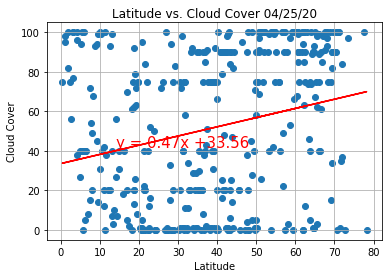

In [20]:
#Establish our X,Y Values & Regression Values
x = north['Lat']
y = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Cloud Cover {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.annotate(line_eq,(14,42),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Cloudiness_Lat_North.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0895639828970113


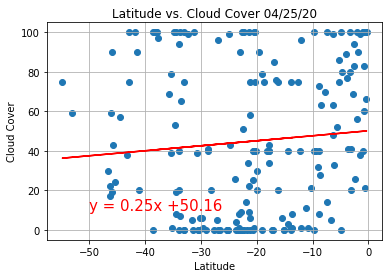

In [21]:
#Establish our X,Y Values & Regression Values
x = south['Lat']
y = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Cloud Cover {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Cloudiness_Lat_South.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2144182133288361


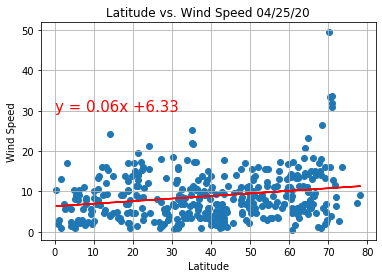

In [22]:
#Establish our X,Y Values &Regression Values
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Wind Speed {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_WindSpeed_Lat_North.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1570102977773072


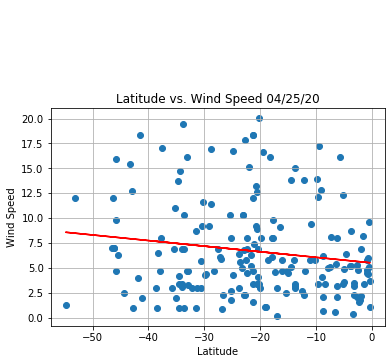

In [23]:
#Establish our X,Y Values &Regression Values
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Wind Speed {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_WindSpeed_Lat_South.png")
plt.show()